In [303]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import copy

In [304]:
data = pd.read_csv('processed_DBUL_data.csv')
data = data.drop(['Unnamed: 0'], axis = 1)

In [305]:
## Fixing CRO stuff
data.loc[:, 'CRO'] = data.CRO.replace('PRA Health Sciences', 'PRA')
data.loc[:, 'CRO'] = data.CRO.replace('Takeda PRA Development Center', 'PRA')

NON_CORE_CRO = ['TBD', 'TFS','Hangzhou Tigermed Consulting','GEICAM', 
                'Atlant', 'INC Research','Parexel', 'Synteract', 
                'MEDISCIENCE PLANNING INC', 'Red Maple Trials, Rho, Triumpharma',
                'Endpoint', 'Bracket', '0', 'Assign Group']
data.loc[data.CRO.isin(NON_CORE_CRO), 'CRO'] = 'Other'

data = data.loc[data.CloseOut < 250, :]
data = data.loc[data.ProtocolPhase != '0', :]
data['isUnlock'] = data.Unlocks > 0

In [306]:
df = copy.deepcopy(data)

In [319]:
df['date'] = pd.to_datetime(df['DBL_ActualDate'])
df = df[df['date'].notna()]
df['year'] = pd.DatetimeIndex(df['date']).year.astype(int)

## Visualizations

In [297]:
def set_plot_style():
    plt.figure(figsize = (10,8))
    sns.set(font_scale = 1)
    sns.set_style("ticks")
    pass

def generate_plot_features(xaxis_title, yaxis_title, title):
    plt.title(f'{title}')
    plt.xlabel(f'{xaxis_title}')
    plt.ylabel(f'{yaxis_title}')
    pass

### Unlock Prevalence

Oncology    41
GI          33
NS          29
NonCore     14
RGH          7
Name: TA, dtype: int64
PRA         38
IQVIA       26
PPD         23
Other       21
Celerion    16
Name: CRO, dtype: int64
I      45
III    37
II     34
IV      8
Name: ProtocolPhase, dtype: int64


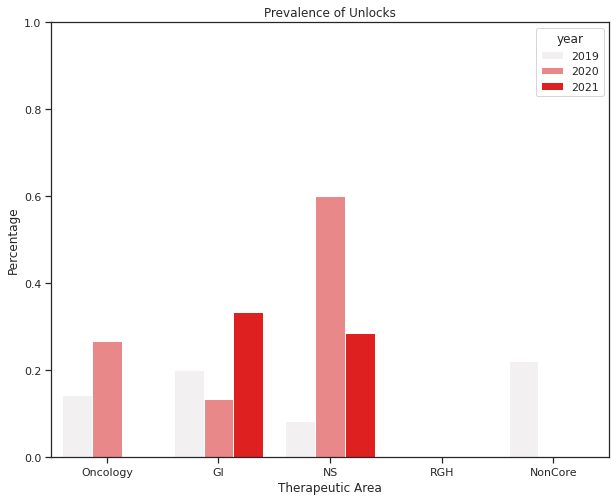

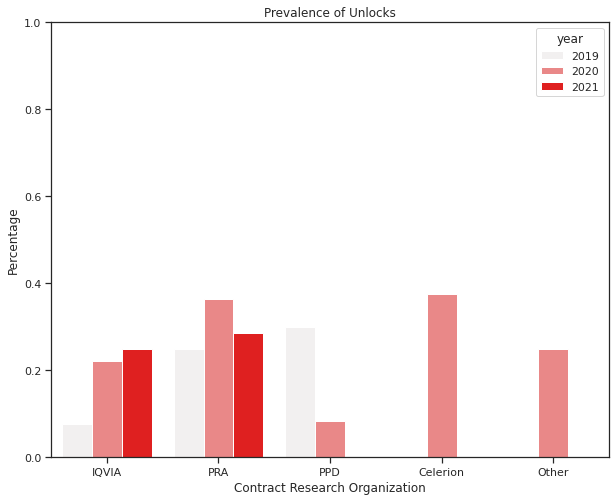

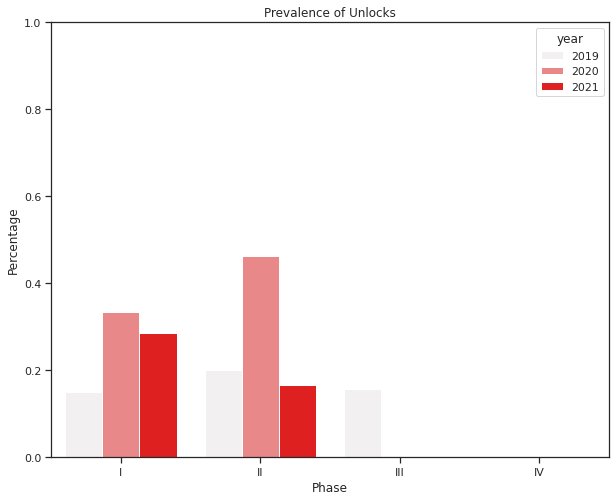

In [326]:
def get_agg_df(df, GROUP_NAME, FIRST_COL, new_prevalence):
    
    if not new_prevalence:
        agg_df = df.groupby(by=[GROUP_NAME, 'year']).agg({'isUnlock':'sum', 'CloseOut': 'count'}).reset_index()
    elif new_prevalence: 
        agg_df = df.groupby(by=[GROUP_NAME, 'year']).agg({'Unlocks':'sum', 'CloseOut': 'count'}).reset_index()
        
    agg_df.columns = [FIRST_COL, 'year', 'UnlockObs', 'TotObs']
    agg_df['Prevalence'] = round(agg_df.UnlockObs/agg_df.TotObs,3)
    
    return agg_df


# Prevalence by TA

agg_df = get_agg_df(df, GROUP_NAME = 'TA', FIRST_COL = 'TA', new_prevalence = False)

xaxis = 'TA'
yaxis = 'Prevalence'

xaxis_title = 'Therapeutic Area'
yaxis_title = 'Percentage'
title = 'Prevalence of Unlocks'

label_order = ['Oncology', 'GI', 'NS', 'RGH', 'NonCore']

set_plot_style()
ax = sns.barplot(data = agg_df, x = xaxis, y = yaxis, color = 'red', 
                 hue = 'year', ci = None, order=label_order)
ax.set_ylim(0,1)
generate_plot_features(xaxis_title, yaxis_title, title)
#plt.savefig('TA_UL_Prevalence.png')
print(df.TA.value_counts())


# Prevalence by CRO

agg_df = get_agg_df(df, GROUP_NAME = 'CRO', FIRST_COL = 'CRO', new_prevalence = False)

xaxis = 'CRO'
yaxis = 'Prevalence'

xaxis_title = 'Contract Research Organization'
yaxis_title = 'Percentage'
title = 'Prevalence of Unlocks'

label_order = ['IQVIA', 'PRA', 'PPD', 'Celerion', 'Other']

set_plot_style()
ax = sns.barplot(data = agg_df, x = xaxis, y = yaxis, color = 'red',
                 hue = 'year', ci = None, order=label_order)
ax.set_ylim(0,1)
generate_plot_features(xaxis_title, yaxis_title, title)
#plt.savefig('CRO_UL_Prevalence.png')
print(df.CRO.value_counts())



# Prevalence by Phase

agg_df = get_agg_df(df, GROUP_NAME = 'ProtocolPhase', FIRST_COL = 'Phase', new_prevalence = False)

xaxis = 'Phase'
yaxis = 'Prevalence'

xaxis_title = 'Phase'
yaxis_title = 'Percentage'
title = 'Prevalence of Unlocks'

#label_order = ['Oncology', 'GI', 'NS', 'RGH', 'NonCore']

set_plot_style()
ax = sns.barplot(data = agg_df, x = xaxis, y = yaxis, color = 'red', 
                 hue = 'year', ci = None, order=None)
ax.set_ylim(0,1)
generate_plot_features(xaxis_title, yaxis_title, title)
#plt.savefig('Phase_UL_Prevalence.png')
print(df.ProtocolPhase.value_counts())


Oncology    41
GI          33
NS          29
NonCore     14
RGH          7
Name: TA, dtype: int64
PRA         38
IQVIA       26
PPD         23
Other       21
Celerion    16
Name: CRO, dtype: int64
I      45
III    37
II     34
IV      8
Name: ProtocolPhase, dtype: int64


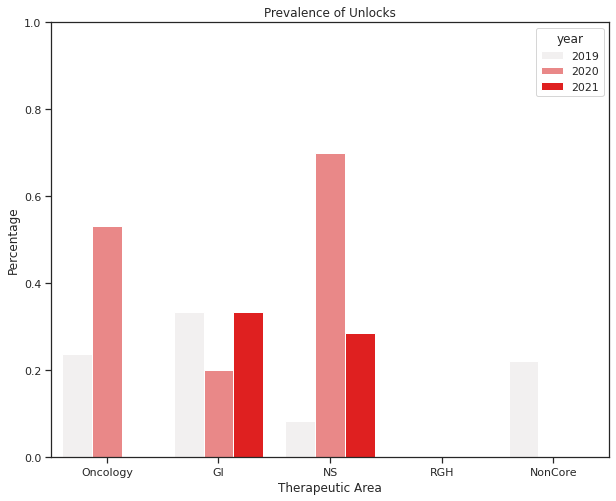

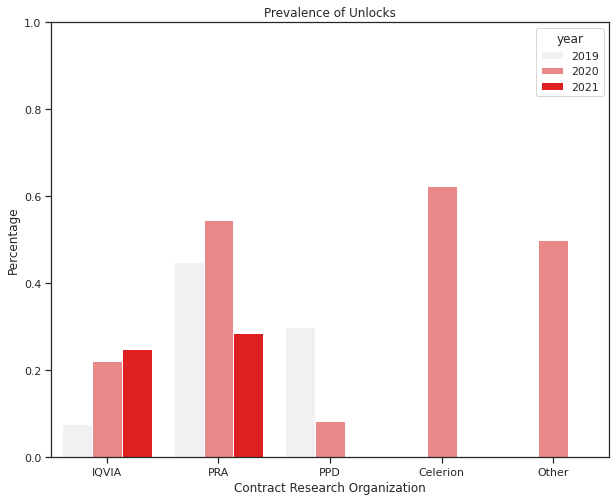

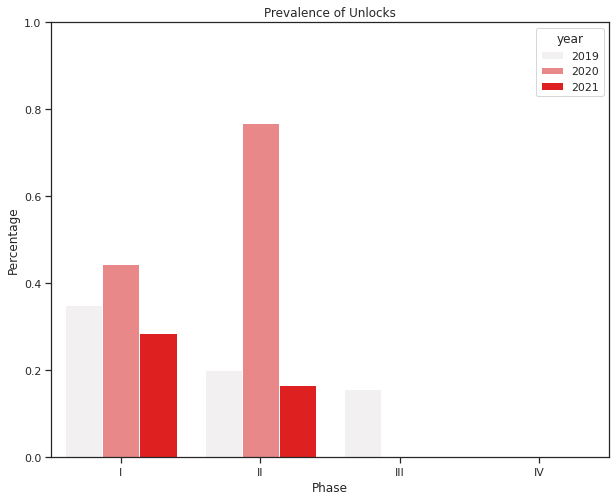

In [325]:

# Prevalence by TA

agg_df = get_agg_df(df, GROUP_NAME = 'TA', FIRST_COL = 'TA', new_prevalence = True)

xaxis = 'TA'
yaxis = 'Prevalence'

xaxis_title = 'Therapeutic Area'
yaxis_title = 'Percentage'
title = 'Prevalence of Unlocks'

label_order = ['Oncology', 'GI', 'NS', 'RGH', 'NonCore']

set_plot_style()
ax = sns.barplot(data = agg_df, x = xaxis, y = yaxis, color = 'red', 
                 hue = 'year', ci = None, order=label_order)
ax.set_ylim(0,1)
generate_plot_features(xaxis_title, yaxis_title, title)
#plt.savefig('TA_UL_New_Prevalence.png')
print(df.TA.value_counts())


# Prevalence by CRO

agg_df = get_agg_df(df, GROUP_NAME = 'CRO', FIRST_COL = 'CRO', new_prevalence = True)

xaxis = 'CRO'
yaxis = 'Prevalence'

xaxis_title = 'Contract Research Organization'
yaxis_title = 'Percentage'
title = 'Prevalence of Unlocks'

label_order = ['IQVIA', 'PRA', 'PPD', 'Celerion', 'Other']

set_plot_style()
ax = sns.barplot(data = agg_df, x = xaxis, y = yaxis, color = 'red', 
                 hue = 'year', ci = None, order=label_order)
ax.set_ylim(0,1)
generate_plot_features(xaxis_title, yaxis_title, title)
#plt.savefig('CRO_UL_New_Prevalence.png')
print(df.CRO.value_counts())



# Prevalence by Phase

agg_df = get_agg_df(df, GROUP_NAME = 'ProtocolPhase', FIRST_COL = 'Phase', new_prevalence = True)

xaxis = 'Phase'
yaxis = 'Prevalence'

xaxis_title = 'Phase'
yaxis_title = 'Percentage'
title = 'Prevalence of Unlocks'

#label_order = ['Oncology', 'GI', 'NS', 'RGH', 'NonCore']

set_plot_style()
ax = sns.barplot(data = agg_df, x = xaxis, y = yaxis, color = 'red', 
                 hue = 'year', ci = None, order=None)
ax.set_ylim(0,1)
generate_plot_features(xaxis_title, yaxis_title, title)
#plt.savefig('Phase_UL_New_Prevalence.png')
print(df.ProtocolPhase.value_counts())


### Counts of Unlocks and Trials

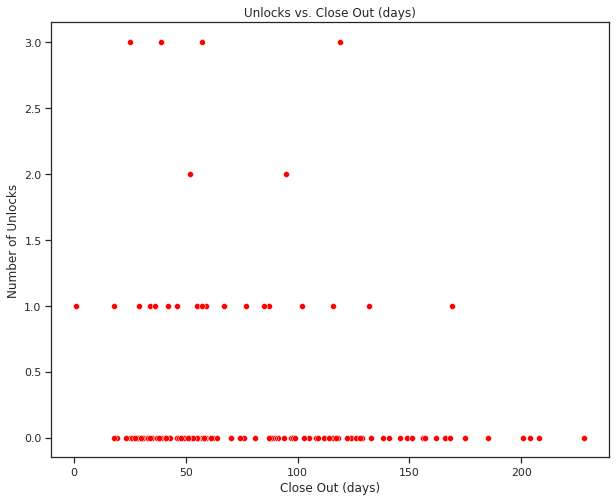

In [258]:
# Unlocks by Close Out

xaxis = 'CloseOut'
yaxis = 'Unlocks'

xaxis_title = 'Close Out (days)'
yaxis_title = 'Number of Unlocks'
title = 'Unlocks vs. Close Out (days)'

set_plot_style()
sns.scatterplot(data = df, x = xaxis, y = yaxis, color = 'red')
generate_plot_features(xaxis_title, yaxis_title, title)


0    100
1     18
3      4
2      2
Name: Unlocks, dtype: int64

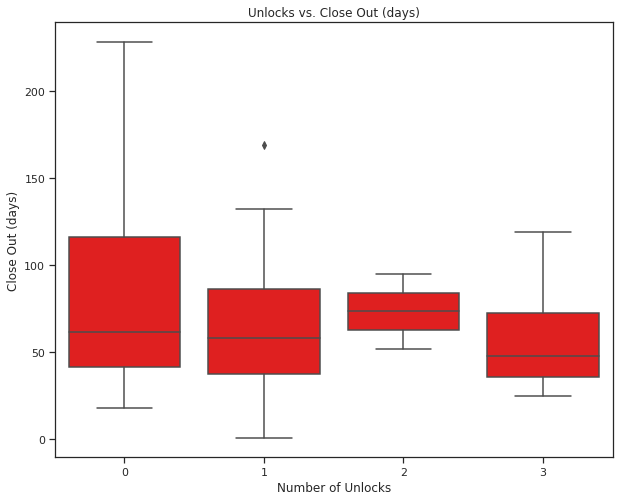

In [283]:
# Unlocks by Close Out

xaxis = 'Unlocks'
yaxis = 'CloseOut'

xaxis_title = 'Number of Unlocks'
yaxis_title = 'Close Out (days)'
title = 'Unlocks vs. Close Out (days)'

set_plot_style()
sns.boxplot(data = df, x = xaxis, y = yaxis, color = 'red')
generate_plot_features(xaxis_title, yaxis_title, title)
df.Unlocks.value_counts()

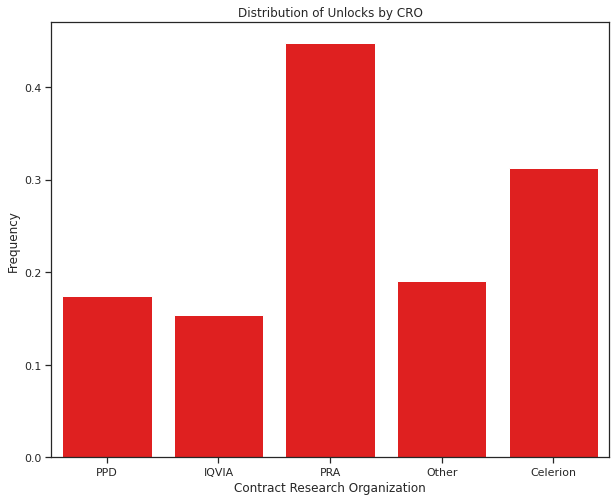

In [260]:
# Unlocks by CRO

xaxis = 'CRO'
yaxis = 'Unlocks'

xaxis_title = 'Contract Research Organization'
yaxis_title = 'Frequency'
title = 'Distribution of Unlocks by CRO'

set_plot_style()
sns.barplot(data = df, x = xaxis, y = yaxis, color = 'red', ci = None)
generate_plot_features(xaxis_title, yaxis_title, title)


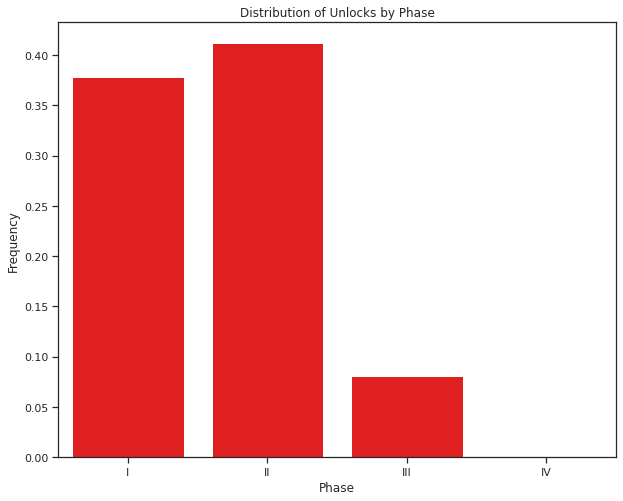

In [261]:
# Unlocks by Phase

xaxis = 'ProtocolPhase'
yaxis = 'Unlocks'

xaxis_title = 'Phase'
yaxis_title = 'Frequency'
title = 'Distribution of Unlocks by Phase'

label_order = ['I', 'II', 'III', 'IV']

set_plot_style()
sns.barplot(data = df, x = xaxis, y = yaxis, color = 'red', ci = None, order=label_order)
generate_plot_features(xaxis_title, yaxis_title, title)


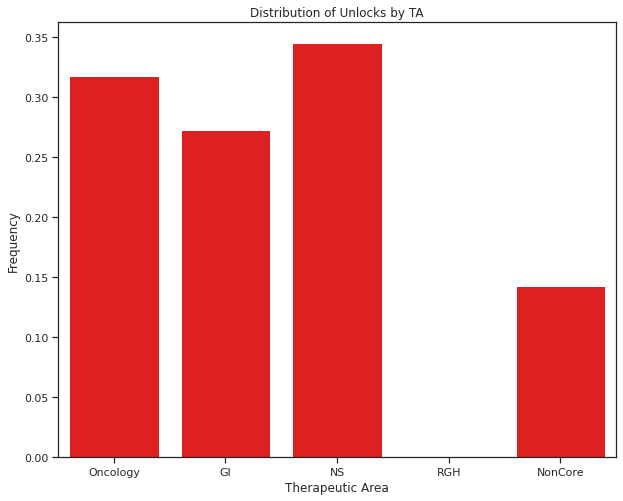

In [262]:
# Unlocks by TA

xaxis = 'TA'
yaxis = 'Unlocks'

xaxis_title = 'Therapeutic Area'
yaxis_title = 'Frequency'
title = 'Distribution of Unlocks by TA'

label_order = ['Oncology', 'GI', 'NS', 'RGH', 'NonCore']

set_plot_style()
sns.barplot(data = df, x = xaxis, y = yaxis, color = 'red', ci = None, order=label_order)
generate_plot_features(xaxis_title, yaxis_title, title)


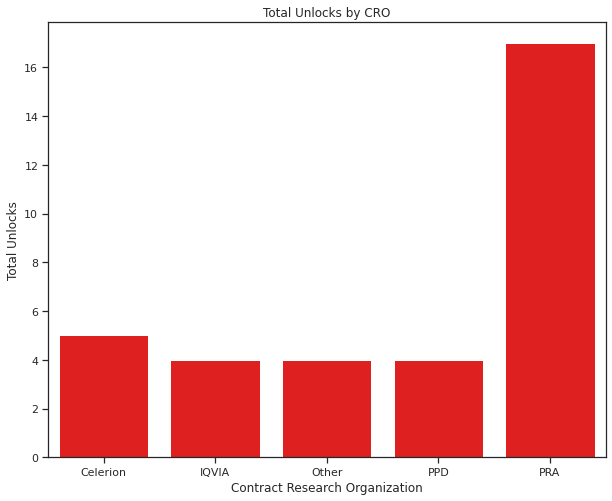

In [263]:
### Aggregations to plot the total unlocks
GROUP_NAME = 'CRO'

agg_df = df.groupby(by=[GROUP_NAME]).agg({'Unlocks':'sum'}).reset_index()

xaxis = 'CRO'
yaxis = 'Unlocks'

xaxis_title = 'Contract Research Organization'
yaxis_title = 'Total Unlocks'
title = 'Total Unlocks by CRO'

set_plot_style()
sns.barplot(data = agg_df, x = xaxis, y = yaxis, color = 'red', ci = None)
generate_plot_features(xaxis_title, yaxis_title, title)

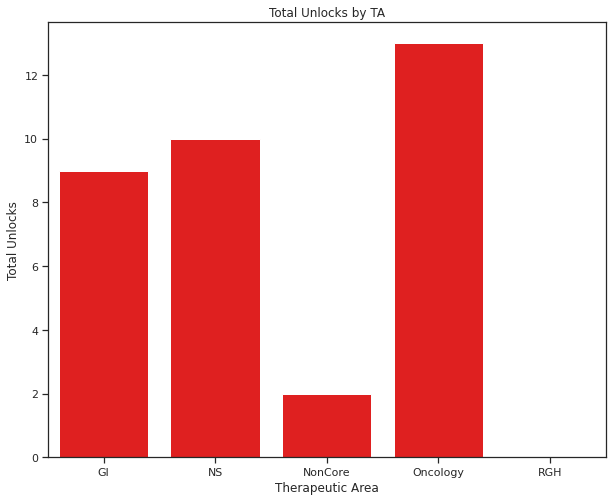

In [264]:
### Aggregations to plot the total unlocks
GROUP_NAME = 'TA'

agg_df = df.groupby(by=[GROUP_NAME]).agg({'Unlocks':'sum'}).reset_index()

xaxis = 'TA'
yaxis = 'Unlocks'

xaxis_title = 'Therapeutic Area'
yaxis_title = 'Total Unlocks'
title = 'Total Unlocks by TA'

set_plot_style()
sns.barplot(data = agg_df, x = xaxis, y = yaxis, color = 'red', ci = None)
generate_plot_features(xaxis_title, yaxis_title, title)

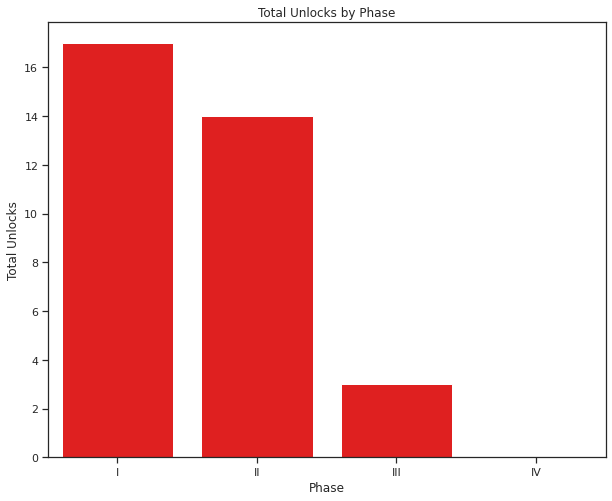

In [265]:
### Aggregations to plot the total unlocks
GROUP_NAME = 'ProtocolPhase'

agg_df = df.groupby(by=[GROUP_NAME]).agg({'Unlocks':'sum'}).reset_index()

xaxis = 'ProtocolPhase'
yaxis = 'Unlocks'

xaxis_title = 'Phase'
yaxis_title = 'Total Unlocks'
title = 'Total Unlocks by Phase'

set_plot_style()
sns.barplot(data = agg_df, x = xaxis, y = yaxis, color = 'red', ci = None)
generate_plot_features(xaxis_title, yaxis_title, title)